<a href="https://colab.research.google.com/github/nomccc/Data_Mining/blob/main/uasdatmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import library penting

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Import dataset food review amazon
df = pd.read_csv('/content/drive/MyDrive/Reviews.csv')

In [4]:
df.Summary.head()

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [5]:
df.Text.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

# Text Preprocessing

untuk teks preprocessing ini, digunakan TextBlob Library. pada preprocessing ini, dihapus stopwords, tanda baca, dan mengkonversikan semua huruf menjadi hurug kecil, mengubah kata menjadi kata dasar, spell check. TextBlob dibangun berdasarkan NLTK dan menyediakan interface mudah untuk dipadukan dengan library NLTK. 

In [6]:
import nltk
nltk.download("stopwords")
nltk.download("wordnet")

from nltk.corpus import stopwords 
from textblob import TextBlob
from textblob import Word
# jadiin huruf kecil dan ngilangin tanda baca

df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for
x in x.split()))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [7]:
df['Text'] = df['Text'].str.replace('[^\w\s]', "")
df.Text.head(5)

<ipython-input-7-b5343ec7cad8>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace('[^\w\s]', "")


0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
3    if you are looking for the secret ingredient i...
4    great taffy at a great price there was a wide ...
Name: Text, dtype: object

In [8]:
# ngehapus stopwords
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in
x.split() if x not in stop))
df.Text.head()

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanutsth...
2    confection around centuries light pillowy citr...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
Name: Text, dtype: object

In [9]:
#Lemmatization
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).
lemmatize() for word in x.split()]))
df.Text.head()

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanutsth...
2    confection around century light pillowy citrus...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
Name: Text, dtype: object

In [10]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

Wordcloud adalah visualisasi dari text data. hasilnya ada memperlihatkan sekumpulan kata yang keutamaannya diperlihatkan dari ukuran font atau warnanya.

In [11]:
# buat data frame baru "reviews" buat ekplorasi data
reviews = df
# ngehapus nilai null
reviews.dropna(inplace=True)

In [12]:
score_1 = reviews[reviews['Score'] == 1]
score_2 = reviews[reviews['Score'] == 2]
score_3 = reviews[reviews['Score'] == 3]
score_4 = reviews[reviews['Score'] == 4]
score_5 = reviews[reviews['Score'] == 5]

In [13]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

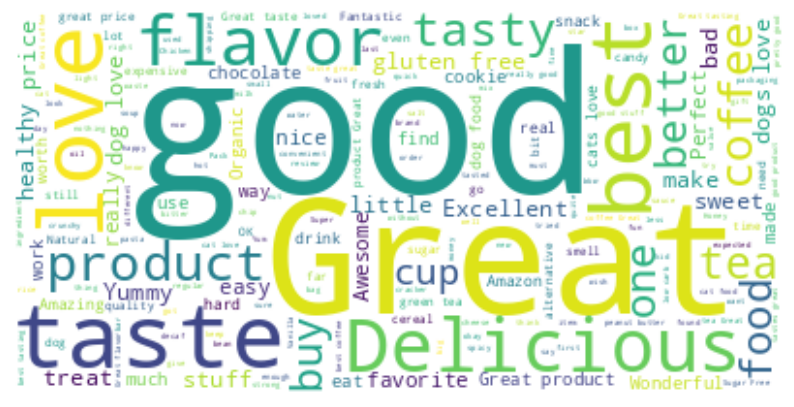

In [14]:
#Wordcloud function's input needs to be a single string of text.
# concatenating all Summaries into a single string.
# similarly you can build for Text column
reviews_str = reviews_sample.Summary.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
# misahin data jadi negatif (skor antara 1 atau 2), netral (skor 3), dan  positif (skor antara 4 atau 5)
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1,2]) ]
netral_reviews = reviews_sample[reviews_sample['Score'].isin([3]) ]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4,5]) ]
# ngubah jadi single string
negative_reviews_str = negative_reviews.Summary.str.cat()
netral_reviews_str = netral_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()

Text(0.5, 1.0, 'Reviews with Negative Scores')

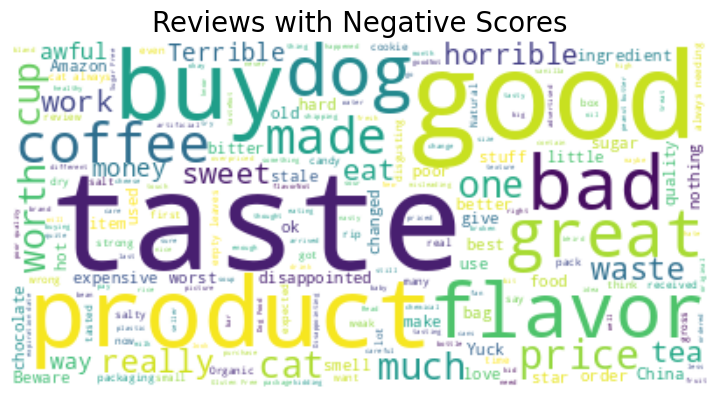

In [16]:
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_netral = WordCloud(background_color='black').generate(netral_reviews_str)
wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews_str)
# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)

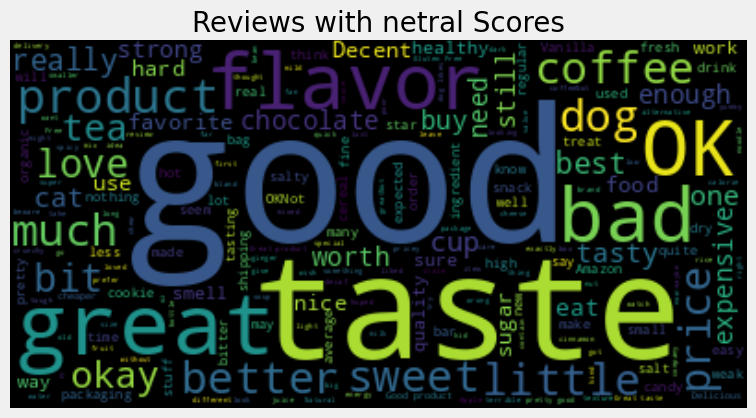

In [25]:
fig = plt.figure(figsize=(10,10))
ax3 = fig.add_subplot(212)
ax3.imshow(wordcloud_netral,interpolation='bilinear')
ax3.axis("off")
ax3.set_title('Reviews with netral Scores',fontsize=20)
plt.show()

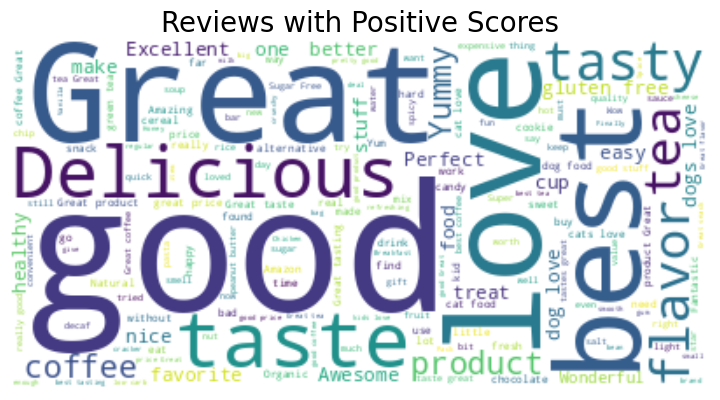

In [18]:
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)
plt.show()

In [19]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.5 MB/s eta 0:00:00


Vader (Valence Aware Dictionary and Sentiment Reasoner) adalah kamus dan tools dengan rule-based sentiment analysis yang digunakan spesifik selaras dengan sentiments-expressed di sosial media. VADER menggunakan kombinasi dari kamus sentimen yang berisi kumpulan kata yang dilabeli secara umum berdasarkan orientasi semantik antara positif atau negatif. 

In [20]:
import re
import os
import sys
import ast
plt.style.use('fivethirtyeight')
#fungsi buat dapetin sentiment
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [21]:
# generate sentimen buat semua kalimat yang ada di dataset
emptyline=[]
for row in df['Text']:
    
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)
#buat dataframe baru dengan sentimen
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.000,0.503,0.497,0.9413
1,0.129,0.762,0.110,-0.1027
2,0.130,0.587,0.283,0.8532
3,0.000,0.854,0.146,0.4404
4,0.000,0.369,0.631,0.9468


In [22]:
# gabungin sentimen kembali ke dataframe reviews
df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.503,0.497,0.9413
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanutsth...,0.129,0.762,0.110,-0.1027
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",confection around century light pillowy citrus...,0.130,0.587,0.283,0.8532


In [27]:
# mengonversi skor ke positif dan negatif sentime menggunakan threshold
df_c['Sentiment'] = np.where(df_c['compound'] >= 0 , 'Positive','Negative')
kolom = ['Summary', "Text", 'Sentiment']
df_cNew = df_c[kolom]
# df_c.head(20)
df_cNew.tail(20)

,Summary,Text,Sentiment
568391,Not so good,soup mostly broth although kick also sweet tas...,Negative
568392,Where's the tortellini?,mostly broth advertised 34 cup vegetable howev...,Positive
568393,Baker's Ammonia Small quantity,past would buy large quantity baker ammonia wo...,Positive
568394,Good buy.,ammonium bicarbonate nice little package need ...,Positive
568395,Baking Ammonia that Works,havent ever used ammonium bicarbonate baking t...,Positive
568396,a-ok,need recipe wife interested trying however web...,Positive
568397,"Delicious, all natural and allergy free treats!",indie candy gummies absolutely delicious buy k...,Positive
568398,Great For Fast Gulasch!,quick easy similar gulasch guest house germany...,Positive
568399,Great Cafe Latte,product great give much energy taste great try...,Positive
568400,Excellent Tea,love tea first discovered pleasure chai attend...,Positive


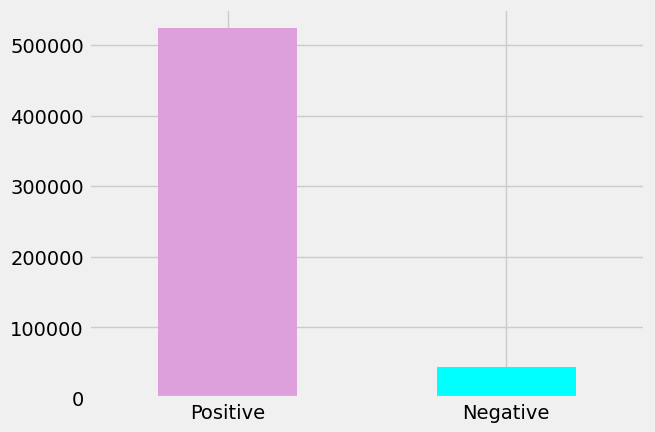

In [24]:
result=df_c['Sentiment'].value_counts()
result.plot(kind='bar', rot=0, color=['plum','cyan']);